# Deep NN

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

tfk = tf.keras
tfkl = tfk.layers 
tfd = tfp.distributions
tfpl = tfp.layers

print("Tensorflow Version: %s" % tf.__version__)
print("Tensorflow Probability Version: %s" % tfp.__version__)

if tf.test.gpu_device_name() != '/device:GPU:0':
    print('GPU device not found. Using CPU')
else:
    print('Found GPU: {}'.format(tf.test.gpu_device_name()))

Tensorflow Version: 2.0.0-beta1
Tensorflow Probability Version: 0.8.0-dev20190619
Found GPU: /device:GPU:0


In [76]:
# commons package
import os
import sys
import importlib

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import commons as cm
import models 
importlib.reload(cm)
importlib.reload(models)

Tensorflow Version: 2.0.0-beta1
Tensorflow Probability Version: 0.8.0-dev20190619
Found GPU: /device:GPU:0


<module 'models' from 'D:\\Tom\\Documents\\gitworkspace\\master\\ml-probability\\tfp_word_embeddings\\models.py'>

# Configuration and Parameters

In [23]:
# GloVe Configuration

# Directory containing the GloVe files.
glove_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt"

# Embedding dimension
embedding_dim = 50

dataset_size = 1.0

words_per_sentence = 2800

In [77]:
setup = cm.setup(glove_dir=glove_dir,
                 embedding_dim=embedding_dim,
                 dataset_size=dataset_size,
                 words_per_sentence=words_per_sentence)
(x_train, x_train_padded, y_train) = setup["train"]
(x_test, x_test_padded, y_test) = setup["test"]
word_index = setup["word_index"]

Found 400000 word vectors.
17361/88587 unknown words


In [11]:
# hidden layers where each element denotes the number of neurons
neurons_hidden_layers = [64, 64, 32]

# number of data points
N = x_train.shape[0]

# batch size for training
batch_size = 128

# training epochs 
epochs = 20

In [78]:
# raw data representation
print(x_train[0], y_train[0])

[1, 132, 8, 132, 497, 254, 8, 30, 6, 52, 20, 12, 47, 94, 483, 33, 4, 208, 273, 12, 16914, 8, 30, 1711, 5, 12, 47, 6, 749, 15, 57, 824, 1462, 80, 1144, 21, 50, 1838, 82, 49, 7, 4, 712, 7, 14, 431, 12, 12030, 38, 254, 8, 30, 52, 5, 8, 79, 94, 749, 638, 15, 518, 4, 529, 215, 235, 23564, 38, 12, 9, 64, 3927, 15, 4, 1218, 63, 26, 343, 34, 14, 431, 26, 4274, 132, 8, 132, 152, 387, 4, 529, 1197, 51, 29, 1291, 9, 208, 21, 9, 21398, 94, 749, 11, 27, 419, 2315, 10742, 14658, 14, 11, 27, 217, 29, 127, 27, 118, 8, 168, 1947, 2070, 1681, 5, 32, 4, 85, 1438, 25, 70, 2623, 19, 4, 686, 31, 2752, 2827, 27, 10395, 47, 8, 1464, 763, 15, 4, 20, 9, 5585, 5, 1978, 94, 2125, 949, 4, 130, 25, 62, 30, 714, 1638, 8, 4, 1174, 15, 132, 8, 132, 9, 24, 290, 149, 21, 50, 26, 195, 757, 8, 4478, 12, 12, 9, 441, 47, 49, 1984, 139, 5, 4, 123, 3247, 13365, 1091, 2102, 7, 265, 25, 144, 24, 1661, 12, 8, 16985, 4890, 40, 4, 4491, 132, 628, 2219, 21, 490, 30, 1200, 4, 1716, 4095, 12, 497, 8, 4003, 129, 483, 60, 48, 129, 1224

In [79]:
# parsed sentence
print(word_index.vec2sentence(x_train[0]))

<START> man to man tries hard to be a good movie it has its heart at the right place it aspires to be epic and it has a message that no doubt everybody will appreciate but there lies also some of the problems of this picture it strives so hard to be good and to get its message across that sometimes the viewer must feel unchallenged so it is only adequate that the images which are used by this picture are simplistic man to man doesn't let the viewer decide what he thinks is right but is hammering its message in his head joseph fiennes exemplifies this in his role he does his best to look concerned genuinely moved and all the other emotions you can express with the single one facial expression his repertoire has to offer add that the movie is overlong and loses its speed towards the end you would be easily led to the conclusion that man to man is not worth watching but there are enough points to defend it it is entertaining has some humorous scenes and the show stealing kristin scott tho

# Model

In [29]:
default_dense_model = models.DefaultDenseModel(model_setup=setup,
                                               neurons_hidden_layers=neurons_hidden_layers)

In [30]:
default_dense_model.keras_summary()

Model: "default_dense_23750_64_64_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2800, 50)          4429400   
_________________________________________________________________
dense_8 (Dense)              (None, 2800, 64)          3264      
_________________________________________________________________
dense_9 (Dense)              (None, 2800, 64)          4160      
_________________________________________________________________
dense_10 (Dense)             (None, 2800, 32)          2080      
_________________________________________________________________
flatten_2 (Flatten)          (None, 89600)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 89601     
Total params: 4,528,505
Trainable params: 99,105
Non-trainable params: 4,429,400
_______________________

In [ ]:
default_dense_model.fit(epochs=epochs, batch_size=batch_size, weights_only=False)

# History

In [31]:
(history_df, last_epoch) = default_dense_model.load_history()

Loaded history successfully. Last epoch: 20


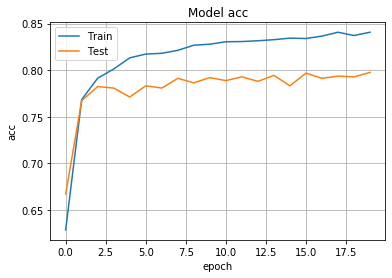

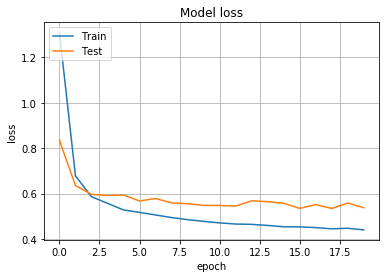

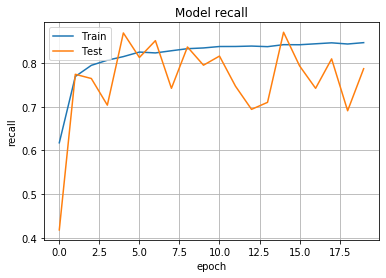

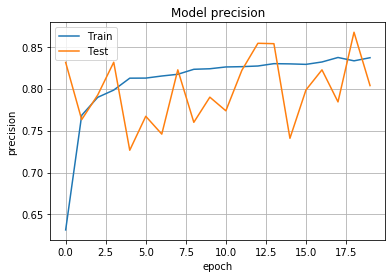

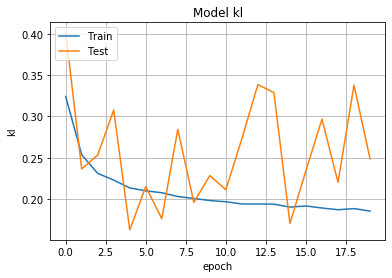

In [32]:
for metric in ["acc", "loss", "recall", "precision", "kl"] :
    cm.plot_metric(metric, history_df)
    plt.show()

In [41]:
def test_model(x, y):
    test_result = np.round(default_dense_model.load_model(weights_only=False).predict(x))
    test_errors = np.squeeze(test_result) != y
    correct_percentage = np.sum(test_errors) / len(y)
    print("%i / %i (%.2f%%) are correct" % (len(y) - np.sum(test_errors), len(y), 100 * (1 - correct_percentage)))

In [42]:
test_model(x_test_padded, y_test)

using saved model
20231 / 25000 (80.92%) are correct


In [43]:
sentences = [
    "this was a very bad movie",
    "this was a very good movie",
    "I did not like this movie at all",
    "I hope there will be a sequal",
    "not bad",
    "bad",
    "not good",
    "one of the best movies of the year",
    "the first part was bad but the second part got better",
    "the first part was not bad but after that it just got worse",
    "this film was just brilliant casting location scenery story direction everyone's really suited part they played you could just imagine being there robert redford's is an amazing actor now same being director norman's father came from same scottish island as myself so i loved fact there was a real connection with this film witty remarks throughout film were great it was just brilliant so much that i bought"
]

rating = cm.Rating(word_index, default_dense_model.load_model(weights_only=False))
rating.print(rating.of(sentences))

using saved model
⭐⭐⭐⭐ (41.11%)
this was a very bad movie

⭐⭐⭐⭐⭐⭐⭐ (70.06%)
this was a very good movie

⭐⭐⭐⭐⭐ (53.32%)
I did not like this movie at all

⭐⭐⭐⭐⭐ (50.42%)
I hope there will be a sequal

⭐⭐⭐ (32.50%)
not bad

⭐⭐⭐⭐⭐ (51.19%)
bad

⭐⭐⭐⭐⭐⭐ (63.89%)
not good

⭐⭐⭐⭐⭐⭐ (61.58%)
one of the best movies of the year

⭐⭐⭐⭐ (39.78%)
the first part was bad but the second part got better

⭐⭐ (24.85%)
the first part was not bad but after that it just got worse

⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐ (95.48%)
this film was just brilliant casting location scenery story direction everyone's really suited part they played you could just imagine being there robert redford's is an amazing actor now same being director norman's father came from same scottish island as myself so i loved fact there was a real connection with this film witty remarks throughout film were great it was just brilliant so much that i bought

